In [2]:
#Setup 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Load the dataset
data_path = r"C:\Users\jacov\anaconda_projects\Model Engineering\Data for Task 1.csv"
df = pd.read_csv(data_path)

#Set a save_path for graphs
save_path = r"C:\Users\jacov\anaconda_projects\Model Engineering\EDA_graphs"
os.makedirs(save_path, exist_ok=True)

#visualization style
sns.set_theme(style='whitegrid', font_scale=1.1)
custom_palette = sns.color_palette("coolwarm", 10)
print(f"Graphs will be saved to: {save_path}")

Graphs will be saved to: C:\Users\jacov\anaconda_projects\Model Engineering\EDA_graphs


In [3]:
#Inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
#Missing values check
print("\nMissing Values per Column:")
print(df.isnull().sum())



Missing Values per Column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dim

In [5]:
#Removing Empty Column
df.drop(columns='Unnamed: 32',inplace=True)

In [6]:
#Display first rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


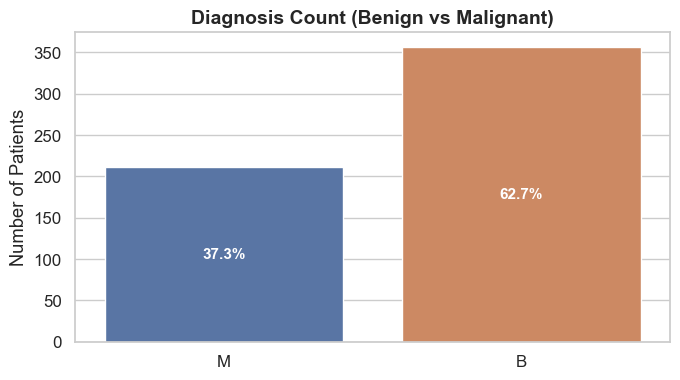

In [7]:
plt.figure(figsize=(7, 4))

ax = sns.countplot(
    data=df,
    x='diagnosis',
    hue='diagnosis',
    legend=False
)
plt.title('Diagnosis Count (Benign vs Malignant)', fontsize=14, weight='bold')
plt.xlabel('')
plt.ylabel('Number of Patients')

#Calculate percentage 
class_len = len(df['diagnosis'])

#Add percentage labels 
for p in ax.patches:
    count = p.get_height()
    percent = round(count / class_len * 100, 1)
    x = p.get_x() + p.get_width() / 2
    y = count / 2
    ax.annotate(f'{percent}%', (x, y), ha='center', va='center', color='white', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(save_path, "diagnosis_distribution_custom.png"), dpi=300, bbox_inches='tight')
plt.show()

In [8]:
#Feature mean of Benign and Malignant groups
df.groupby('diagnosis').mean()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


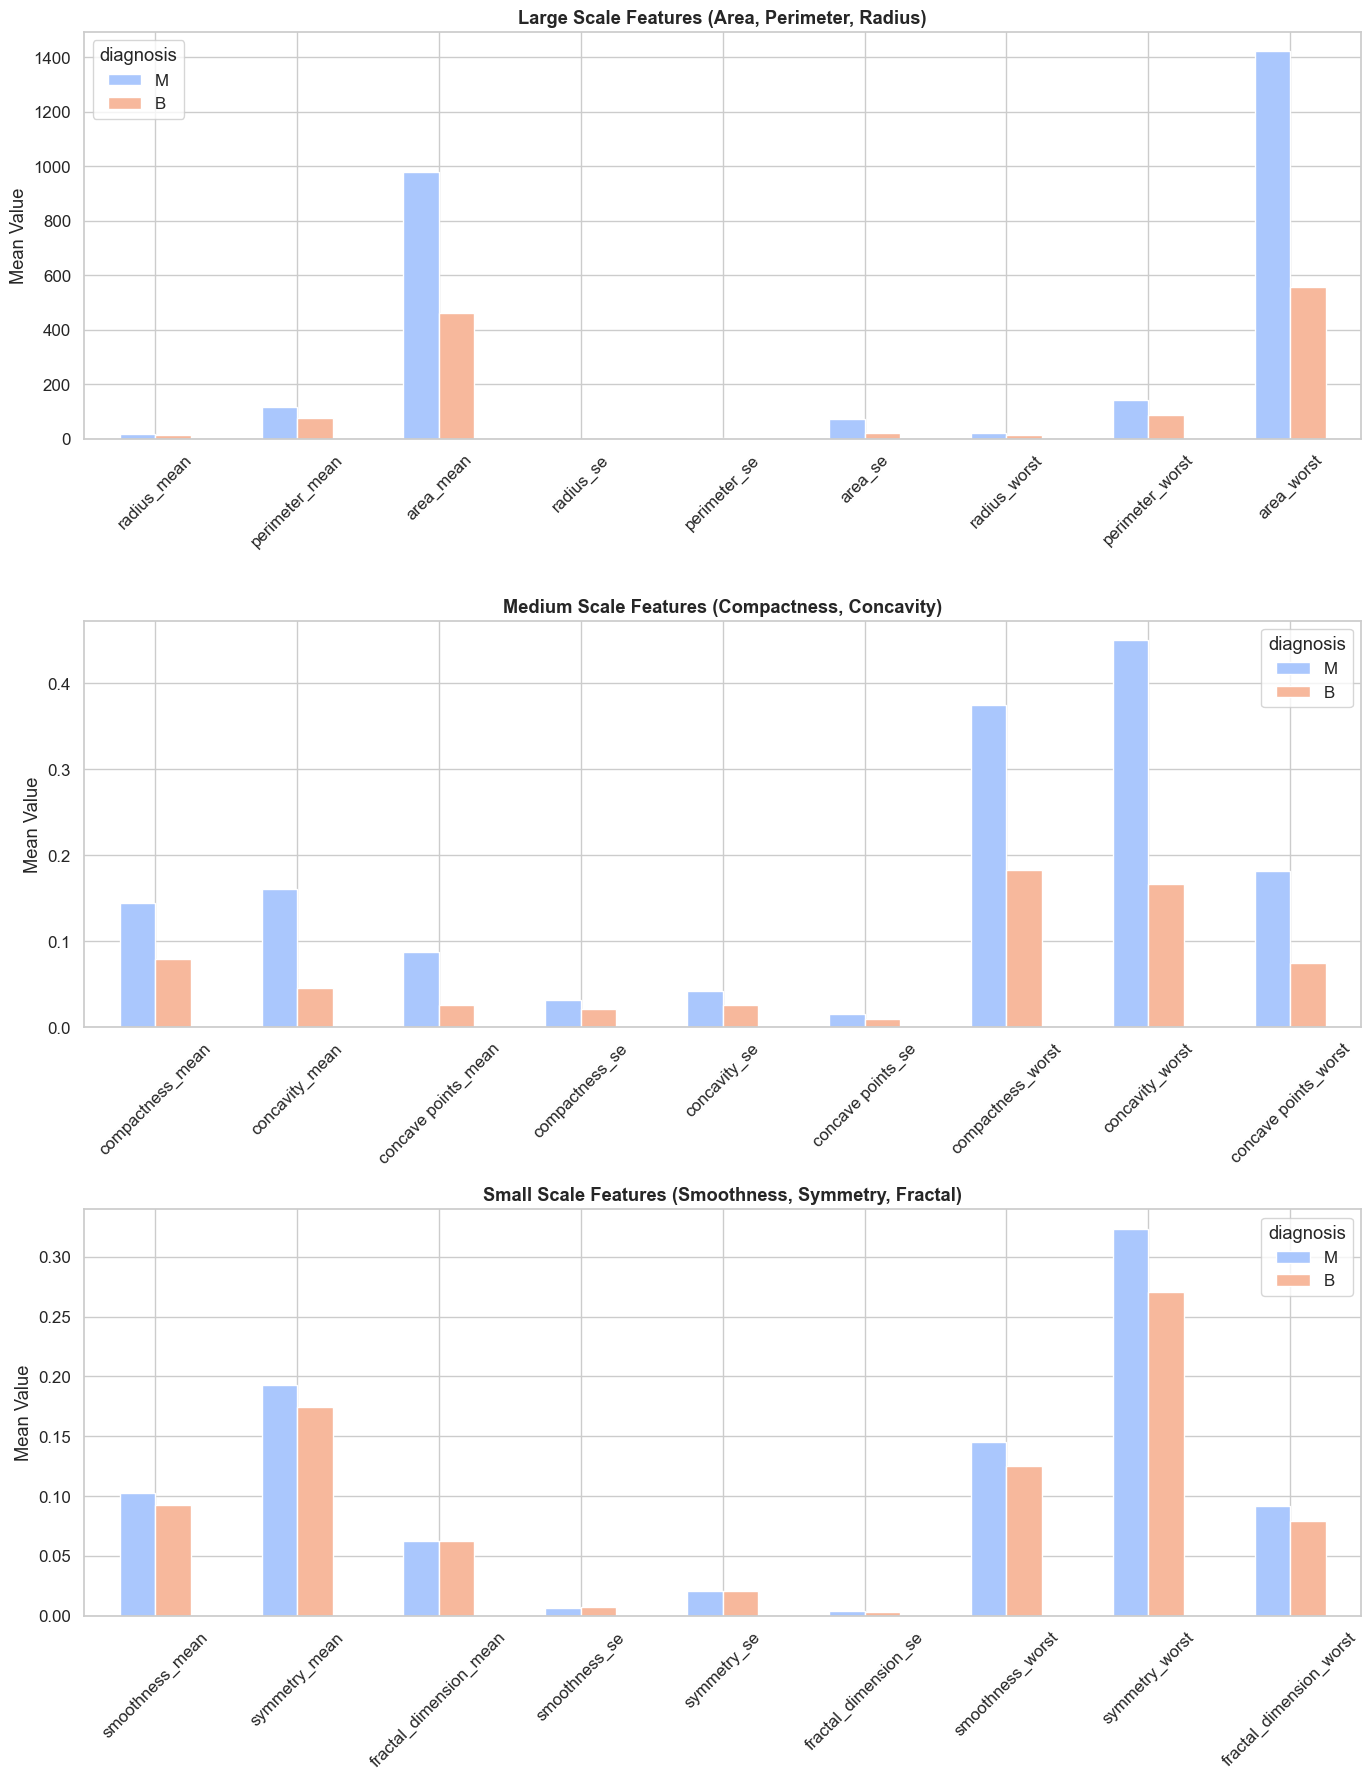

In [9]:
#Plot different feature groups with appropriate scales
feature_means = df.groupby('diagnosis').mean().T

if 'id' in feature_means.index:feature_means = feature_means.drop('id')

#Group features by approximate scale
large_scale_features = [col for col in feature_means.index if any(x in col for x in ['area', 'perimeter', 'radius'])]
medium_scale_features = [col for col in feature_means.index if any(x in col for x in ['compactness', 'concavity', 'concave points'])]
small_scale_features = [col for col in feature_means.index if any(x in col for x in ['smoothness', 'symmetry', 'fractal'])]

#Create subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

#Plot large scale features
if large_scale_features:
    feature_means.loc[large_scale_features][['M', 'B']].plot(kind='bar', ax=axes[0], color=sns.color_palette("coolwarm", n_colors=2))
    axes[0].set_title('Large Scale Features (Area, Perimeter, Radius)', fontweight='bold')
    axes[0].set_ylabel('Mean Value')
    axes[0].tick_params(axis='x', rotation=45)

#Plot medium scale features  
if medium_scale_features:
    feature_means.loc[medium_scale_features][['M', 'B']].plot(kind='bar', ax=axes[1], color=sns.color_palette("coolwarm", n_colors=2))
    axes[1].set_title('Medium Scale Features (Compactness, Concavity)', fontweight='bold')
    axes[1].set_ylabel('Mean Value')
    axes[1].tick_params(axis='x', rotation=45)

#Plot small scale features
if small_scale_features:
    feature_means.loc[small_scale_features][['M', 'B']].plot(kind='bar', ax=axes[2], color=sns.color_palette("coolwarm", n_colors=2))
    axes[2].set_title('Small Scale Features (Smoothness, Symmetry, Fractal)', fontweight='bold')
    axes[2].set_ylabel('Mean Value')
    axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(os.path.join(save_path, "feature_means_by_scale.png"), dpi=300, bbox_inches='tight')
plt.show()

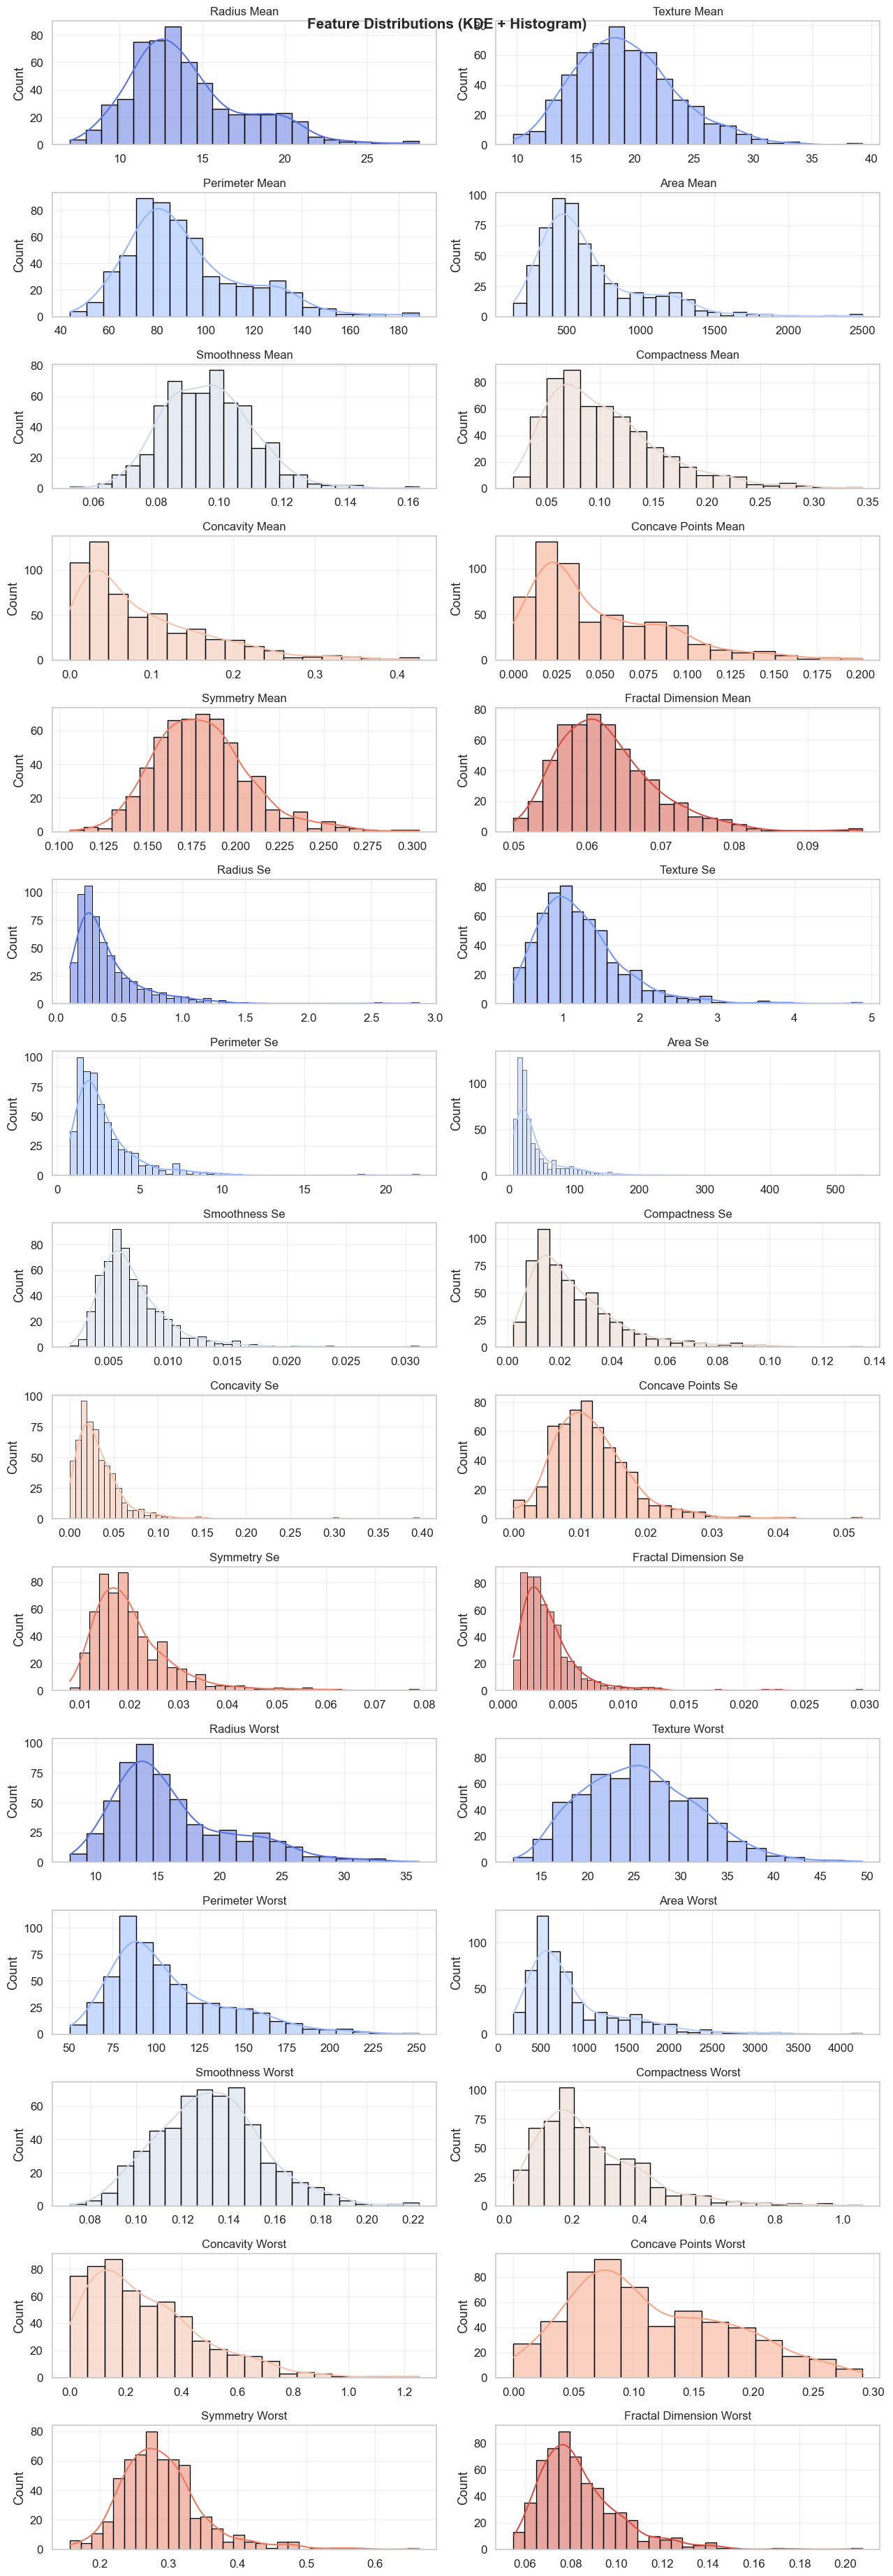

In [10]:
#Histograms & KDE show features distribution

num_features = df.select_dtypes(include=['float64']).columns
n_cols = 2
num_rows = len(num_features) // n_cols + (len(num_features) % n_cols > 0)

fig, axes = plt.subplots(num_rows, n_cols, figsize=(13, num_rows * 2.5))
axes = axes.flatten()


for i, feature in enumerate(num_features):
    sns.histplot(df[feature], kde=True, color=custom_palette[i % len(custom_palette)], ax=axes[i], edgecolor='black')
    axes[i].set_title(feature.replace('_', ' ').title(), fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].grid(True, alpha=0.3)

fig.suptitle('Feature Distributions (KDE + Histogram)', fontsize=15, weight='bold')
plt.tight_layout()
plt.savefig(os.path.join(save_path, "feature_distributions_custom.png"), dpi=300, bbox_inches='tight')
plt.show()


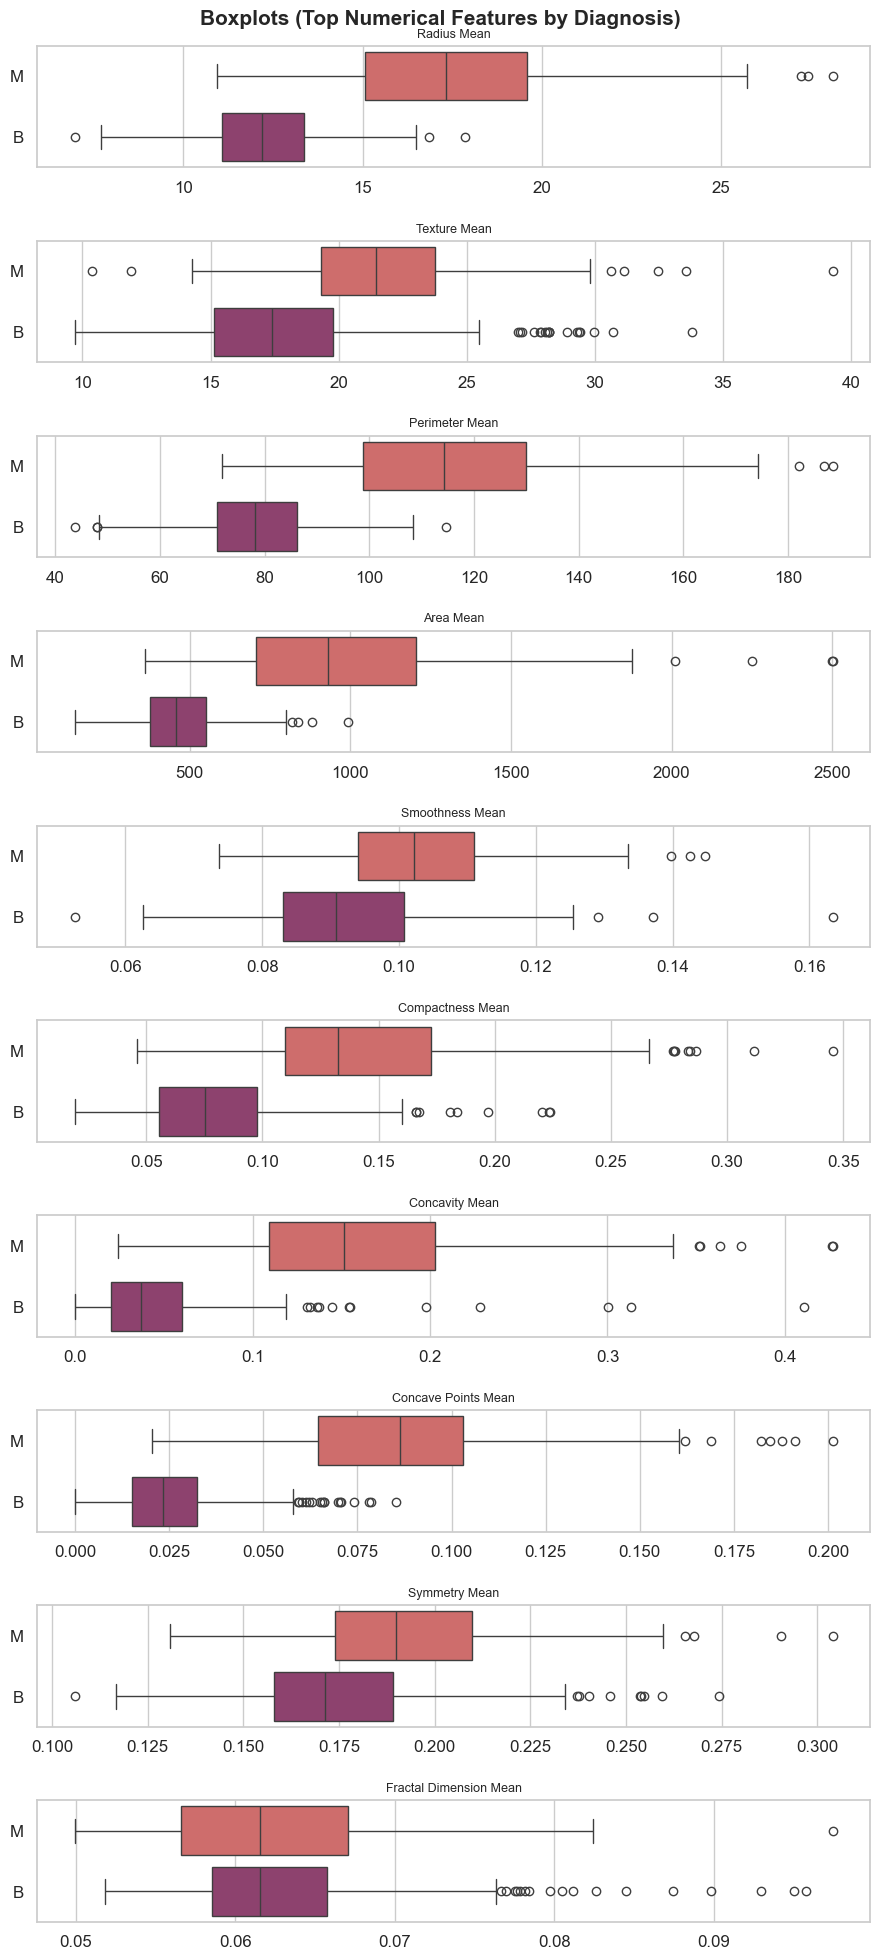

In [11]:
#Boxplots identifing feature spread and outliers 

num_features = df.select_dtypes(include=['float64']).columns[:10] 
fig, axes = plt.subplots(len(num_features), 1, figsize=(9, len(num_features) * 2))

sns.color_palette("coolwarm", n_colors=2)

for i, feature in enumerate(num_features):
    sns.boxplot(
        data=df,
        x=feature,
        y='diagnosis',
        hue='diagnosis',
        palette='flare',
        legend=False,
        ax=axes[i]
    )
    axes[i].set_title(feature.replace('_', ' ').title(), fontsize=9)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

fig.suptitle('Boxplots (Top Numerical Features by Diagnosis)', fontsize=15, weight='bold')
plt.tight_layout(h_pad=1.5)
plt.savefig(os.path.join(save_path, "boxplots_outlier_detection.png"), dpi=300, bbox_inches='tight')
plt.show()


Top features correlated with diagnosis:
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
compactness_mean        0.596534
compactness_worst       0.590998
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
Name: diagnosis_encoded, dtype: float64


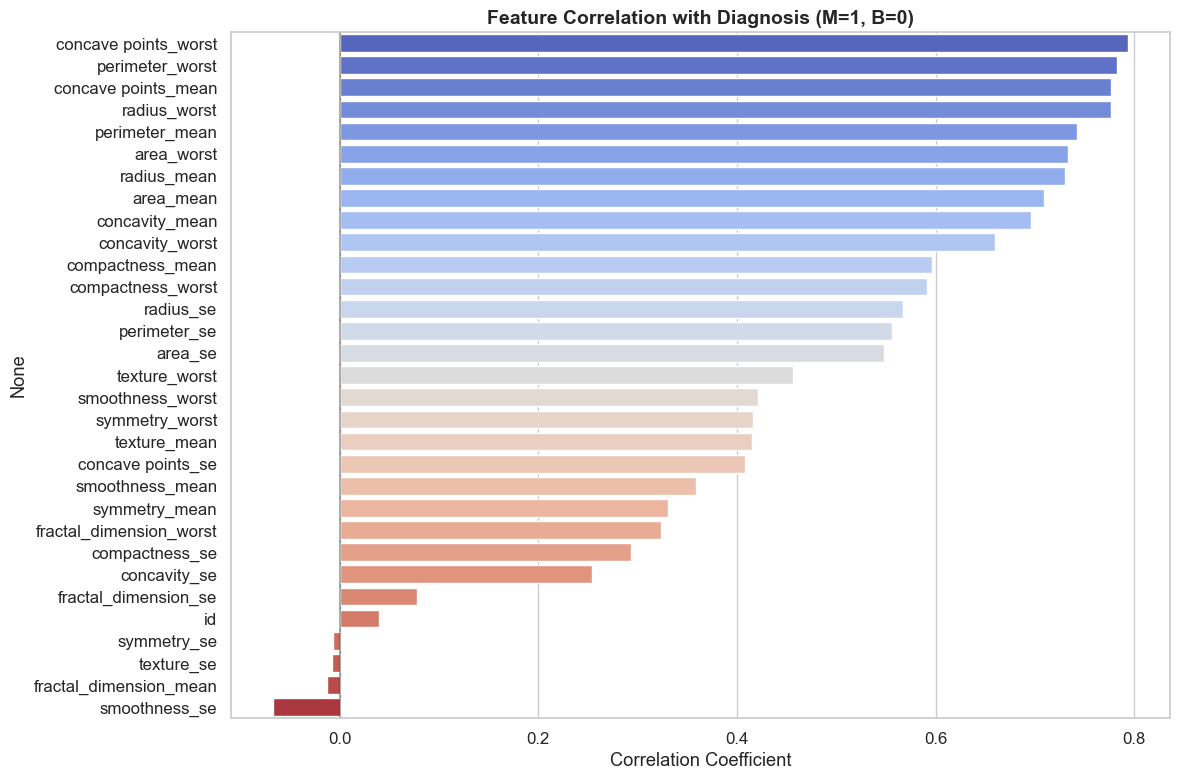


Strongest positive correlation (malignancy indicators): concave points_worst (0.794)
Strongest negative correlation (benign indicators): smoothness_se (-0.067)


In [12]:
#Correlation with diagnosis relationship

#Encode diagnosis for correlation
df_encoded = df.copy()
df_encoded['diagnosis_encoded'] = df_encoded['diagnosis'].map({'M': 1, 'B': 0})

#Calculate correlation 
corr_with_target = df_encoded.select_dtypes(include=['float64', 'int64']).corr()['diagnosis_encoded'].sort_values(ascending=False)

#Remove diagnosis_encoded from results
corr_with_target = corr_with_target[corr_with_target.index != 'diagnosis_encoded']

print("Top features correlated with diagnosis:")
print(corr_with_target.head(15))

#Plot the correlations
plt.figure(figsize=(12, 8))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, hue=corr_with_target.index, palette='coolwarm', legend=False)
plt.title('Feature Correlation with Diagnosis (M=1, B=0)', fontsize=14, weight='bold')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(save_path, "feature_correlation_with_target.png"), dpi=300, bbox_inches='tight')
plt.show()

#Highlight the strongest relationships
print(f"\nStrongest positive correlation (malignancy indicators): {corr_with_target.index[0]} ({corr_with_target.values[0]:.3f})")
print(f"Strongest negative correlation (benign indicators): {corr_with_target.index[-1]} ({corr_with_target.values[-1]:.3f})")

In [13]:
#Analyze feature correlated with diagnosis by groups (mean, se, worst)

def analyze_feature_groups(df):
    df_encoded = df.copy()
    df_encoded['diagnosis_encoded'] = df_encoded['diagnosis'].map({'M': 1, 'B': 0})
    
    print("Feature group analysis:")
    
    for group in ['mean', 'worst', 'se']:
        features = [col for col in df.columns if f'_{group}' in col]
        if features:
            corr = df_encoded[features + ['diagnosis_encoded']].corr()['diagnosis_encoded'].drop('diagnosis_encoded')
            print(f"\nTop 4 {group.upper()} features correlated with diagnosis:")
            print(corr.abs().sort_values(ascending=False).head(4))

analyze_feature_groups(df)

Feature group analysis:

Top 4 MEAN features correlated with diagnosis:
concave points_mean    0.776614
perimeter_mean         0.742636
radius_mean            0.730029
area_mean              0.708984
Name: diagnosis_encoded, dtype: float64

Top 4 WORST features correlated with diagnosis:
concave points_worst    0.793566
perimeter_worst         0.782914
radius_worst            0.776454
area_worst              0.733825
Name: diagnosis_encoded, dtype: float64

Top 4 SE features correlated with diagnosis:
radius_se            0.567134
perimeter_se         0.556141
area_se              0.548236
concave points_se    0.408042
Name: diagnosis_encoded, dtype: float64


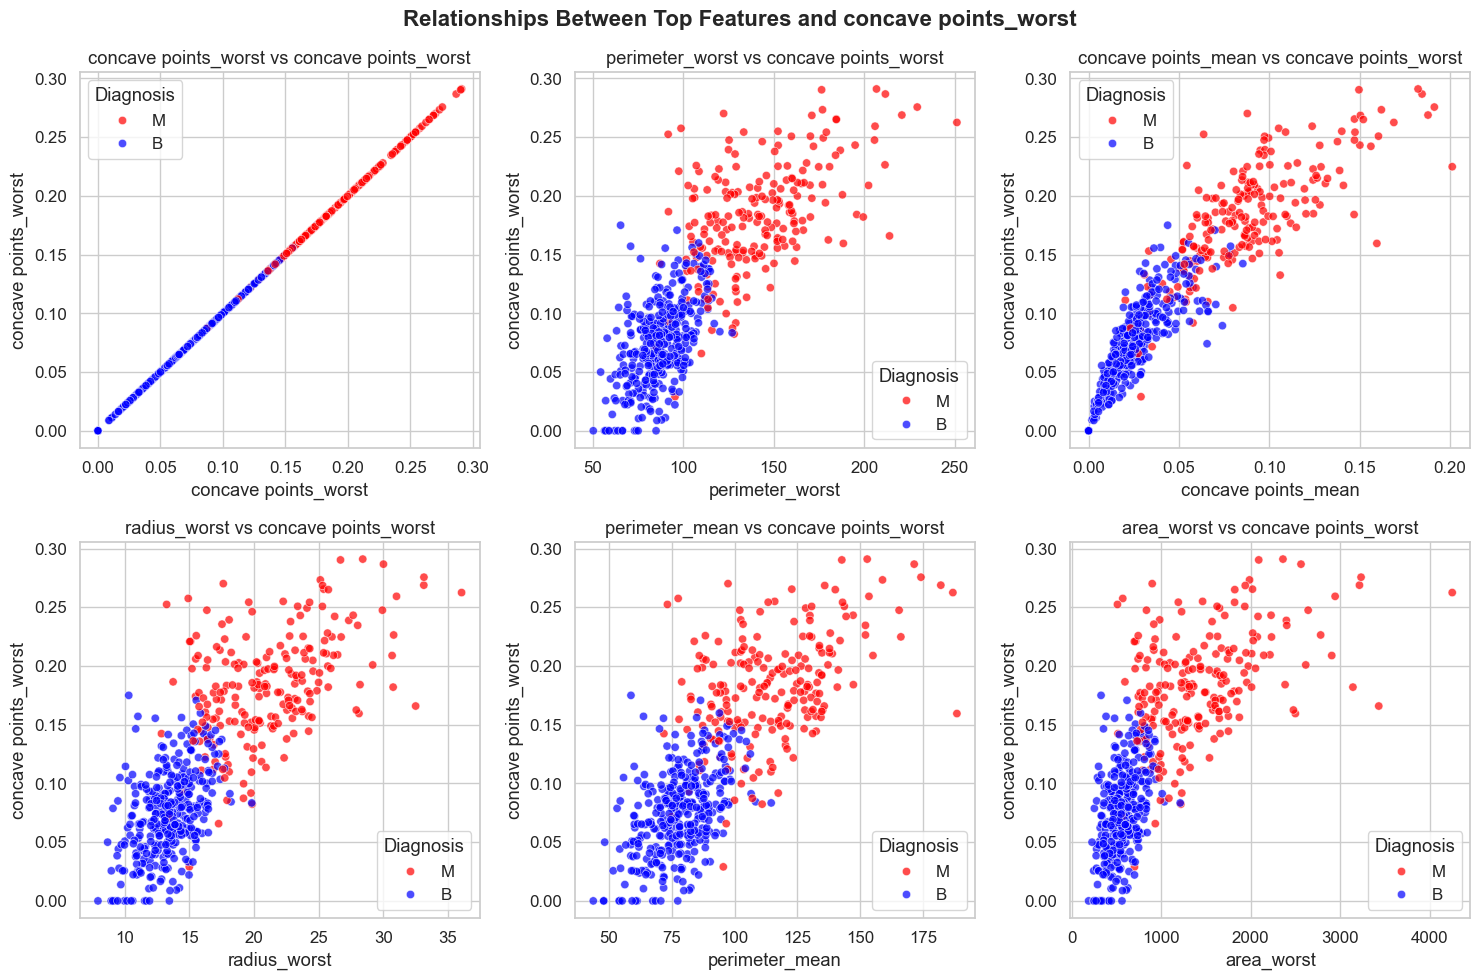

In [14]:
#Analyze relationships between top correlated features vs Concave_points_worst
top_features = corr_with_target.head(6).index.tolist()

#Scatter plots of top features against Concave_points_worst
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(top_features[:6]):
    sns.scatterplot(data=df, x=feature, y='concave points_worst', hue='diagnosis', 
                   palette={'M': 'red', 'B': 'blue'}, alpha=0.7, ax=axes[i])
    axes[i].set_title(f'{feature} vs concave points_worst')
    axes[i].legend(title='Diagnosis')

plt.suptitle('Relationships Between Top Features and concave points_worst', fontsize=16, weight='bold')
plt.tight_layout()
plt.savefig(os.path.join(save_path, "feature_relationships_scatter_concave_worst.png"), dpi=300, bbox_inches='tight')
plt.show()



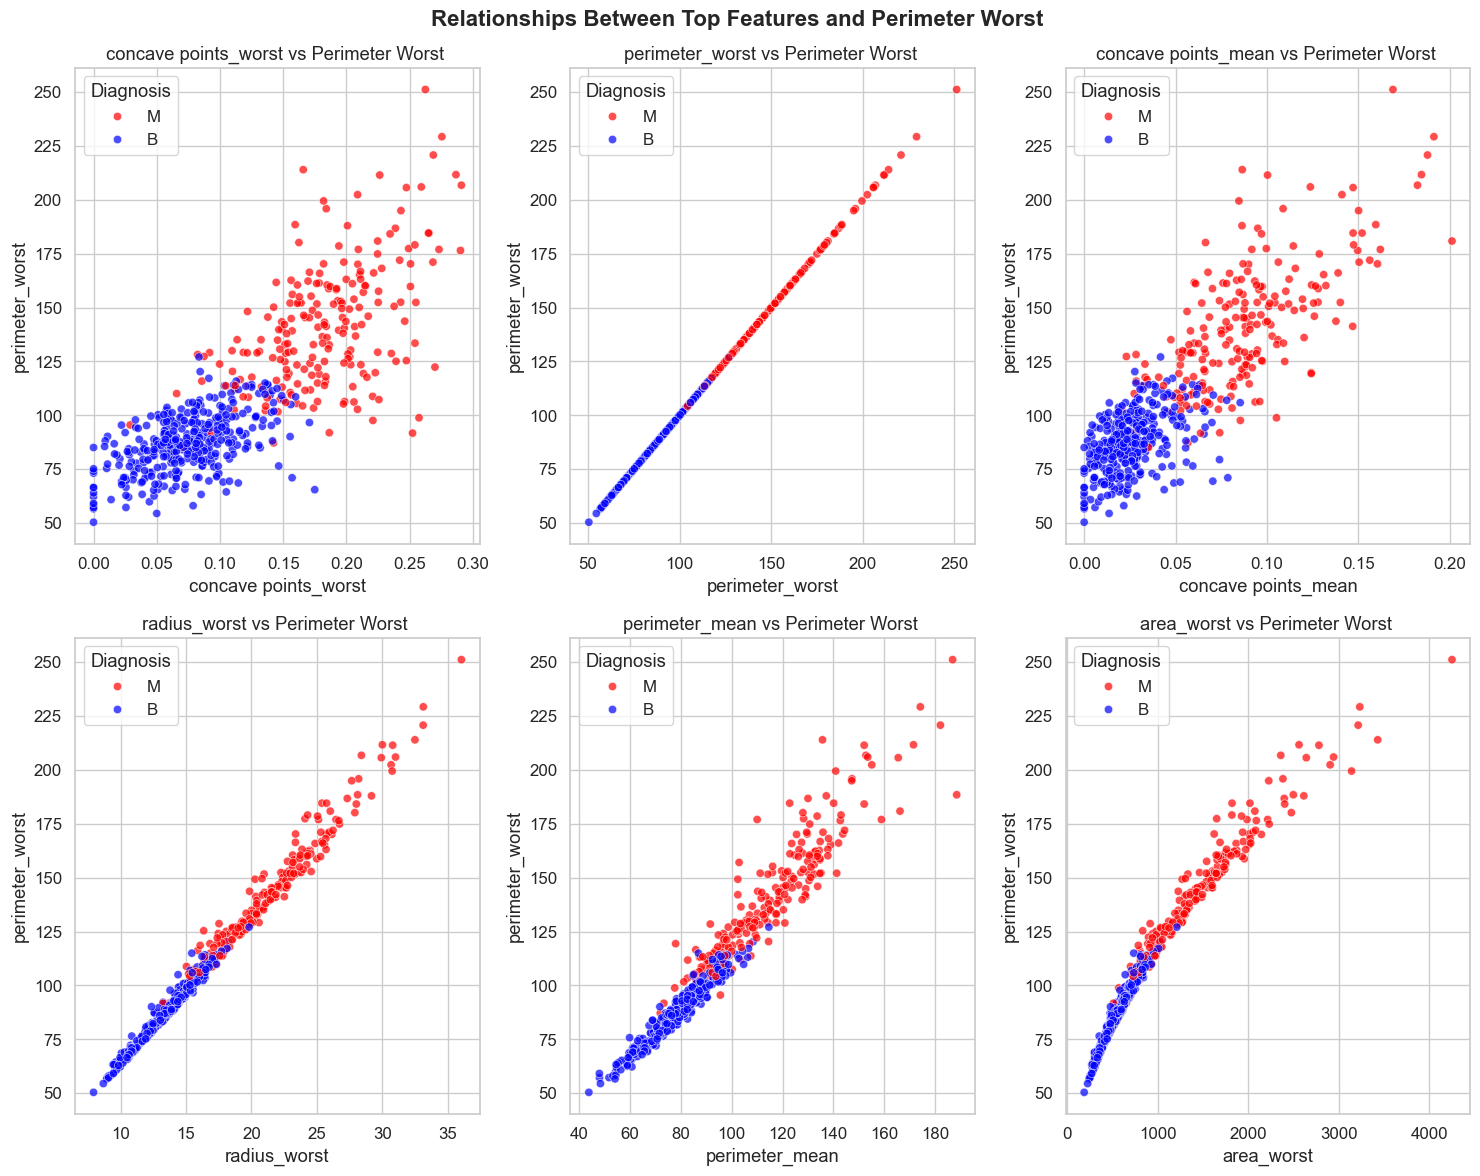

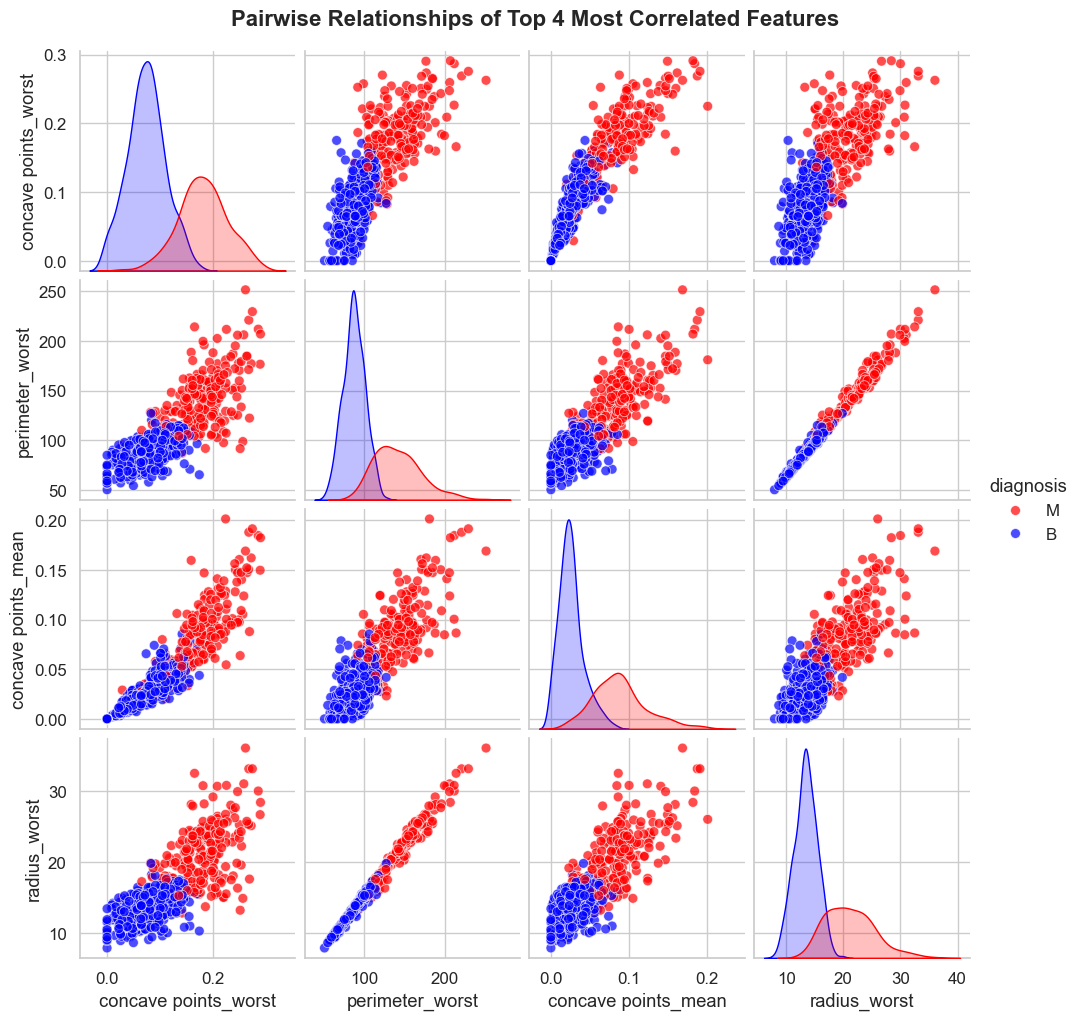

In [15]:
#Analyze relationships between top correlated features vs Perimeter Worst   
top_features = corr_with_target.head(6).index.tolist()

#Scatter plots of top features against each other, colored by diagnosis
fig, axes = plt.subplots(2, 3, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(top_features[:6]):
    sns.scatterplot(data=df, x=feature, y='perimeter_worst', hue='diagnosis', palette={'M': 'red', 'B': 'blue'}, alpha=0.7, ax=axes[i])
    axes[i].set_title(f'{feature} vs Perimeter Worst ')
    axes[i].legend(title='Diagnosis')

plt.suptitle('Relationships Between Top Features and Perimeter Worst ', fontsize=16, weight='bold')
plt.tight_layout()
plt.savefig(os.path.join(save_path, "feature_relationships_scatterperimeter_worst _.png"), dpi=300, bbox_inches='tight')
plt.show()

#Pairplot of top 4 most correlated features
top_4_features = top_features[:4]
pairplot = sns.pairplot(df, vars=top_4_features, hue='diagnosis', palette={'M': 'red', 'B': 'blue'}, plot_kws={'alpha': 0.7, 's': 50})
pairplot.fig.suptitle('Pairwise Relationships of Top 4 Most Correlated Features', y=1.02, fontsize=16, weight='bold')
pairplot.savefig(os.path.join(save_path, "top_features_pairplot.png"), dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#Visualize how strong features are correlated 
plt.figure(figsize=(14, 12))

corr = df.select_dtypes(include=['float64', 'int64']).corr()

#Create the heatmap 
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.8}, annot_kws={'size': 9, 'weight': 'normal'}, square=True)

plt.title('Feature Correlation Heatmap', fontsize=16, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(save_path, "correlation_heatmap.png"), dpi=300, bbox_inches='tight')
plt.show()